<span style="color:orange">

# Student Performance Prediction using Machine Learning

### About the Dataset

**Description:**
The Student Performance Dataset is designed to examine factors influencing academic student performance. It comprises 10,000 student records, each containing predictors and a performance index.

**Variables:**
- **Hours Studied:** Total hours spent studying by each student.
- **Previous Scores:** Scores from previous tests.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours:** Average hours of sleep per day for each student.
- **Sample Question Papers Practiced:** Number of sample question papers the student has practiced.

**Target Variable:**
- **Performance Index:** Rounded measure of each student's overall academic performance, ranging from 10 to 100. Higher values indicate better performance.

**Dataset Purpose:**
The dataset aims to provide insights into how variables such as studying hours, previous scores, extracurricular activities, sleep patterns, and practice with sample question papers relate to student performance. It is a synthetic dataset created for illustrative purposes, offering a platform for researchers and data analysts to explore educational factors and their impacts.

**Note:**
This dataset is synthetic, meaning it was generated artificially for illustrative purposes. Thus, while it facilitates analysis of educational influences, the relationships observed may not fully reflect real-world scenarios.


The data can be accessed from [Student Performance Data-set](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression), which is a public resource.

**The objective of using this dataset is to predict the `Performance` of Students based on the extracted features provided in `Student_Performance.csv`.**

# 1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import os
import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import root_mean_squared_error,r2_score,mean_squared_error

In [2]:
# Customization for Visualisation of Graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 2. Data Collection and Preprocessing

In [3]:
od.download('https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression')

Skipping, found downloaded files in ".\student-performance-multiple-linear-regression" (use force=True to force download)


In [4]:
os.listdir('student-performance-multiple-linear-regression')

['Student_Performance.csv']

In [157]:
df = pd.read_csv('student-performance-multiple-linear-regression/Student_Performance.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# Check for null value
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [158]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## 2.1 Data Exploration and Visualization

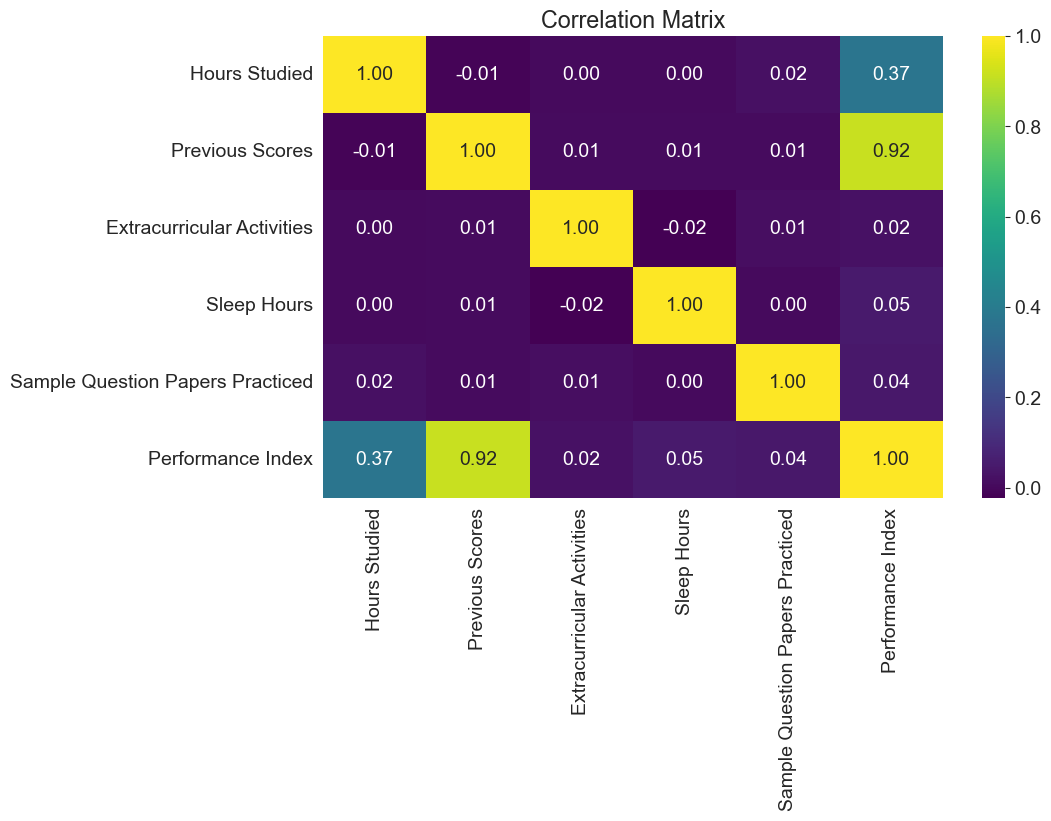

In [10]:
# Check for Correleation of each columns
corr = df.corr()
plt.title("Correlation Matrix")
sns.heatmap(corr, annot=True, fmt=".2f",cmap='viridis', cbar=True)
plt.show()

## 2.2 Data Splitting

In [11]:
# Input column is X and Target column is y
X = df[['Hours Studied','Previous Scores']]
y = df['Performance Index']

In [12]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [13]:
# using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Modelling

In [136]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores
    train_r2 = r2_score(y_train, y_train_pred)*100
    test_r2 = r2_score(y_test, y_test_pred)*100
    
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Print the scores
    print(f"Training Score (R^2): {train_r2}")
    print(f"Testing Score (R^2): {test_r2}")
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    
    return test_r2, test_rmse

# Initialize a list to store the results
results = []

## 3.1 Linear Regression

In [138]:
linear_model = LinearRegression()
print("LinearRegression")
test_r2, test_rmse = evaluate_model(linear_model, X_train, y_train, X_test, y_test)
results.append(['Linear Regression', test_r2, test_rmse])

LinearRegression
Training Score (R^2): 98.58696583934669
Testing Score (R^2): 98.5855014245765
Training RMSE: 2.2824274304787613
Testing RMSE: 2.289524227116088


## 3.2 Polynomial Regression

In [140]:
# Create a polynomial features object of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Evaluate the model
print("Polynomial Regression:")
test_r2, test_rmse = evaluate_model(model, X_train_poly, y_train, X_test_poly, y_test)
results.append(['Polynomial Regression', test_r2, test_rmse])

Polynomial Regression:
Training Score (R^2): 98.58760527867469
Testing Score (R^2): 98.58563492759195
Training RMSE: 2.281910939422129
Testing RMSE: 2.289416179781838


## 3.3 Ridge Regression

In [142]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Initialize RidgeCV model with specified alphas and cross-validation folds
ridgeCV = RidgeCV(alphas=alphas, cv=4)
print("Ridge Model:")
test_r2, test_rmse = evaluate_model(ridgeCV, X_train, y_train, X_test, y_test)
results.append(['Ridge Regression', test_r2, test_rmse])
print(f"Best alpha: {ridgeCV.alpha_}")

Ridge Model:
Training Score (R^2): 98.5869658237001
Testing Score (R^2): 98.5854836257077
Training RMSE: 2.2824274431154676
Testing RMSE: 2.2895386318012028
Best alpha: 0.1


## 3.4  Lasso Regression

In [143]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])

# Initialize LassoCV model with specified alphas, maximum iterations, and cross-validation folds
lassoCV = LassoCV(alphas=alphas2, max_iter=50000, cv=3)
print("Lasso Model:")
test_r2, test_rmse = evaluate_model(lassoCV, X_train, y_train, X_test, y_test)
results.append(['Lasso Regression', test_r2, test_rmse])
print(f"Best alpha: {lassoCV.alpha_}")

Lasso Model:
Training Score (R^2): 98.58696583929184
Testing Score (R^2): 98.58550064139607
Training RMSE: 2.282427430523067
Testing RMSE: 2.2895248609485868
Best alpha: 1e-05


## 3.5 ElasticNet

In [144]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])
l1_ratios = np.linspace(0.1, 0.9, 9)

# Initialize ElasticNetCV model with specified alphas, l1_ratios, maximum iterations, and cross-validation folds
elasticNetCV = ElasticNetCV(alphas=alphas2, l1_ratio=l1_ratios, max_iter=10000)
print("ElasticNet Model:")
test_r2, test_rmse = evaluate_model(elasticNetCV, X_train, y_train, X_test, y_test)
results.append(['ElasticNet Regression', test_r2, test_rmse])
print(f"Best alpha: {elasticNetCV.alpha_}, Best l1_ratio: {elasticNetCV.l1_ratio_}")

ElasticNet Model:
Training Score (R^2): 98.58696581252097
Testing Score (R^2): 98.58548012328893
Training RMSE: 2.282427452144111
Testing RMSE: 2.2895414663099527
Best alpha: 0.0001, Best l1_ratio: 0.9


## 3.6 Decision Tree Regressor

In [145]:
# Initialize Decision Tree Regressor with best parameters
dt_model = DecisionTreeRegressor(max_depth=30, min_samples_leaf=10, random_state=42)

print("Decision Tree:")
test_r2, test_rmse = evaluate_model(dt_model, X_train, y_train, X_test, y_test)
results.append(['Decision Tree Regression', test_r2, test_rmse])

Decision Tree:
Training Score (R^2): 98.66587276390435
Testing Score (R^2): 98.5134820738645
Training RMSE: 2.2177841362213067
Testing RMSE: 2.347086317315597


## 3.7 Random Forest Regression

In [146]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=8, min_samples_leaf=5, n_jobs=-1, random_state=42)

print("Random Forest:")
test_r2, test_rmse = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
results.append(['Random Forest Regression', test_r2, test_rmse])

Random Forest:
Training Score (R^2): 98.65789930384949
Testing Score (R^2): 98.52494368757101
Training RMSE: 2.224401597439517
Testing RMSE: 2.3380203477472805


## 3.8 Support Vector Regression (SVR)

In [147]:
svr_model = SVR(C=15, epsilon=0.02, kernel='linear')

print("Support Vector Regressor:")
test_r2, test_rmse = evaluate_model(svr_model, X_train, y_train, X_test, y_test)
results.append(['Support Vector Regression', test_r2, test_rmse])

Support Vector Regressor:
Training Score (R^2): 98.58651770152879
Testing Score (R^2): 98.58780127282756
Training RMSE: 2.282789332898403
Testing RMSE: 2.2876621890573148


## 3.9 Gradient Boosting Regression

In [148]:
# Initialize XGB Regressor
xgb_model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=500,
                    learning_rate=0.1, max_depth=15, subsample=0.8,
                    colsample_bytree=0.7)

# Evaluate the best model
print("XGBoost Regressor:")
test_r2, test_rmse = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)
results.append(['Gradient Boosting Regression', test_r2, test_rmse])

XGBoost Regressor:
Training Score (R^2): 98.5964268827699
Testing Score (R^2): 98.58065440528469
Training RMSE: 2.274773541659338
Testing RMSE: 2.2934435939470137


# 4. Comparison of Models

In [151]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Regressor', 'Test Score R²', 'Test RMSE'])
print(results_df)  # Print the results

                      Regressor  Test Score R²  Test RMSE
0             Linear Regression      98.585501   2.289524
1         Polynomial Regression      98.585635   2.289416
2              Ridge Regression      98.585484   2.289539
3              Lasso Regression      98.585501   2.289525
4         ElasticNet Regression      98.585480   2.289541
5      Decision Tree Regression      98.513482   2.347086
6      Random Forest Regression      98.524944   2.338020
7     Support Vector Regression      98.587801   2.287662
8  Gradient Boosting Regression      98.580654   2.293444


# 5. Actual vs Predicted

In [155]:
# For Support Vector Regression
y_test_pred  = svr_model.predict(X_test)

pred_df= pd.DataFrame({'Actual': np.round(y_test, 0), 
                   'Predicted': np.round(y_test_pred, 0)})
pred_df

,Actual,Predicted
6252,51.0,55.0
4684,20.0,23.0
1731,46.0,47.0
4742,28.0,30.0
4521,41.0,44.0
...,...,...
6412,45.0,47.0
8285,66.0,62.0
7853,16.0,17.0
1095,65.0,63.0


# Overall Conclusion

 - **SVR Performance:** SVR demonstrates high accuracy with a Test Score R² of **98.59%** and low RMSE of **2.29**. This indicates that SVR fits the data well and generalizes effectively, similar to other linear regression-based models such as Ridge, Lasso, and ElasticNet.

- **Tree-Based Models:** Decision Tree and Random Forest perform well but show slightly lower R² scores and marginally higher RMSE compared to linear models. This could be attributed to their tendency to overfit.

- **Gradient Boosting Regression:** Stands out by achieving comparable performance to linear models, indicating effective ensemble learning and boosting.

# Recommendation

- **For Predictive Tasks:**
  - **Interpretability and Simplicity:** Linear regression-based models (including Ridge, Lasso, ElasticNet, and SVR) are suitable choices due to their high accuracy and ease of interpretation.
  - **Complex Relationships:** If capturing more complex relationships or benefiting from ensemble learning is necessary, Gradient Boosting Regression is recommended for its robust performance.


In [159]:
pred_df.to_csv('Performance.csv', index=None)